# Import libraries

In [6]:
import pandas as pd

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
import mllib

In [11]:
import time

# Import dataset

Import and read dataset:

In [12]:
trainingData = pd.read_csv('csv/cleaned/trainingData_clean.csv',index_col=0)

In [13]:
validationData = pd.read_csv('csv/validationData.csv')

In [14]:
X_train = pd.read_csv('csv/transformed/X_train.csv',index_col=0)

In [15]:
X_test = pd.read_csv('csv/transformed/X_test.csv',index_col=0)

In [16]:
X_val = pd.read_csv('csv/transformed/X_val.csv',index_col=0)

# Predict building_floor

Lets use Decision Tree, K Nearest Neighbors, Logistic Regression, Random Forest and Support Vector Machine to predict building and floor.

## Create new feature

To predict building and floor lets define a unique number BUILDINGID*10 + FLOOR, that has  building and floor in it:

In [17]:
trainingData['building_floor'] = trainingData['BUILDINGID']*10 + trainingData['FLOOR']

In [18]:
validationData['building_floor'] = validationData['BUILDINGID']*10 + validationData['FLOOR']

For example: 23 is building 2, floor 3

## Define target

Building target vectors for train,test and validation:

In [19]:
y_train = list(trainingData.loc[X_train.index,['building_floor']]['building_floor'])

In [20]:
y_test = list(trainingData.loc[X_test.index,['building_floor']]['building_floor'])

In [21]:
y_val = list(validationData.loc[X_val.index,['building_floor']]['building_floor'])

## Decision tree

In [22]:
# collect accuracy and perfomance of models
accuracy_train = {}
accuracy_test = {}
accuracy_val = {}
perfomance_time_cl = {}

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier(min_samples_leaf = 2,
                              max_depth = 55,
                              random_state=42)

In [25]:
start = time.time()
tree.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['DT'] = stop - start

<AxesSubplot:>

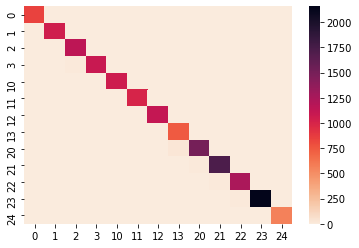

In [26]:
# train
acc_scor = mllib.model_check(y_train, tree.predict(X_train), tree)
accuracy_train['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              tree.predict(X_train), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

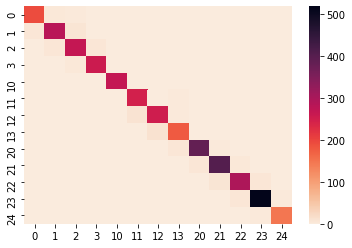

In [27]:
# test
acc_scor = mllib.model_check(y_test, tree.predict(X_test), tree)
accuracy_test['DT'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              tree.predict(X_test), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

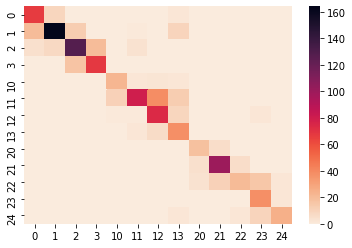

In [28]:
# val
acc_scor = mllib.model_check(y_val, tree.predict(X_val), tree)
accuracy_val['DT'] = acc_scor
mllib.model_check(y_val, tree.predict(X_val), tree, output ='cmatrix')
sns.heatmap(mllib.model_check(y_val, 
                              tree.predict(X_val), 
                              tree, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Knearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,
                           weights='distance')


In [30]:
start = time.time()
knn.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['KNN'] = stop - start

<AxesSubplot:>

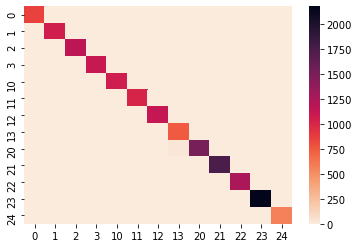

In [31]:
# train 
acc_scor = mllib.model_check(y_train, knn.predict(X_train), knn)
accuracy_train['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              knn.predict(X_train), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

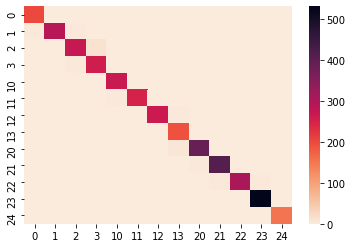

In [32]:
# test
acc_scor = mllib.model_check(y_test, knn.predict(X_test), knn)
accuracy_test['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              knn.predict(X_test), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

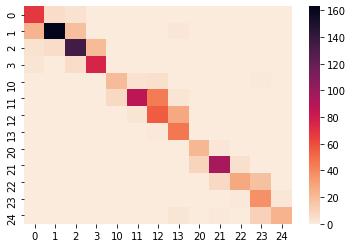

In [33]:
# val
acc_scor = mllib.model_check(y_val, knn.predict(X_val), knn)
accuracy_val['KNN'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              knn.predict(X_val), 
                              knn, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Logistic regression

Performs slow with big number of categories (for example building-floor)

In [34]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=1000)


In [35]:
start = time.time()
lg.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['LR'] = stop - start

<AxesSubplot:>

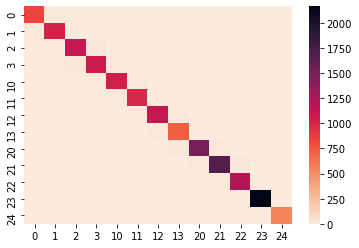

In [36]:
# train
acc_scor = mllib.model_check(y_train, lg.predict(X_train), lg)
accuracy_train['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              lg.predict(X_train), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

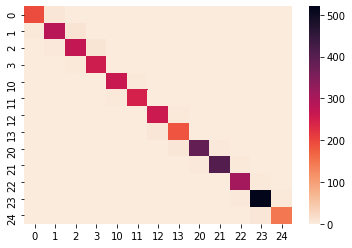

In [37]:
# test
acc_scor = mllib.model_check(y_test, lg.predict(X_test), lg)
accuracy_test['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              lg.predict(X_test), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

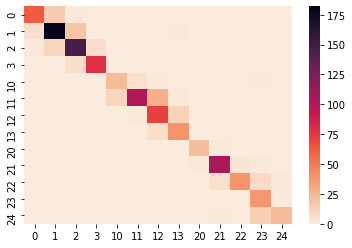

In [38]:
# val
acc_scor = mllib.model_check(y_val, lg.predict(X_val), lg)
accuracy_val['LR'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              lg.predict(X_val), 
                              lg, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=16,
                            max_features =13,
                            max_depth=54, 
                            random_state=42)


In [41]:
start = time.time()
rf.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['RF'] = stop - start

<AxesSubplot:>

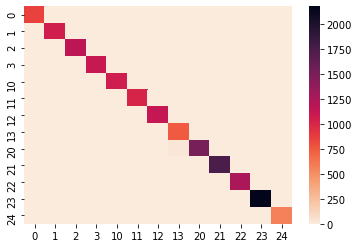

In [42]:
# train
acc_scor = mllib.model_check(y_train, rf.predict(X_train), rf)
accuracy_train['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              rf.predict(X_train), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

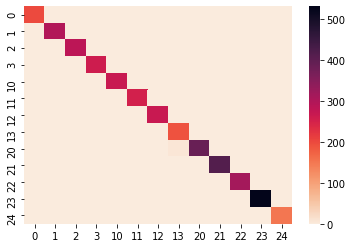

In [43]:
# test
acc_scor = mllib.model_check(y_test, rf.predict(X_test), rf)
accuracy_test['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              rf.predict(X_test), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

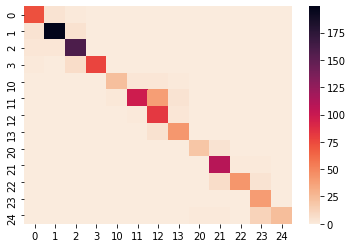

In [44]:
# val
acc_scor = mllib.model_check(y_val, rf.predict(X_val), rf)
accuracy_val['RF'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              rf.predict(X_val), 
                              rf, 
                              output ='cmatrix'),
           cmap='rocket_r')

## Support Vector Machine

Performs slow with big number of categories (for example building-floor)

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(kernel='rbf')

In [47]:
start = time.time()
svm.fit(X_train, y_train)
stop = time.time()
perfomance_time_cl['SVM'] = stop - start

<AxesSubplot:>

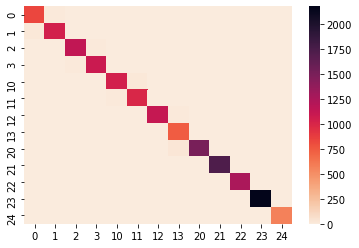

In [48]:
# train
acc_scor = mllib.model_check(y_train, svm.predict(X_train), svm)
accuracy_train['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_train, 
                              svm.predict(X_train), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

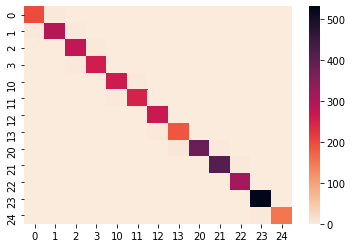

In [49]:
# test
acc_scor = mllib.model_check(y_test, svm.predict(X_test), svm)
accuracy_test['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_test, 
                              svm.predict(X_test), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

<AxesSubplot:>

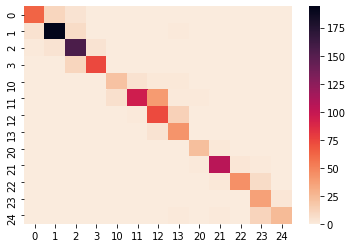

In [50]:
# val
acc_scor = mllib.model_check(y_val, svm.predict(X_val), svm)
accuracy_val['SVM'] = acc_scor
sns.heatmap(mllib.model_check(y_val, 
                              svm.predict(X_val), 
                              svm, 
                              output ='cmatrix'),
           cmap='rocket_r')

## COMPARE accuracy of models

In [51]:
accuracy_df = pd.DataFrame({'accuracy':accuracy_train.values(),'set':['train']*len(accuracy_train),'model':accuracy_train.keys()})
accuracy_df_test = pd.DataFrame({'accuracy':accuracy_test.values(),'set':['test']*len(accuracy_test),'model':accuracy_test.keys()})
accuracy_df_val = pd.DataFrame({'accuracy':accuracy_val.values(),'set':['val']*len(accuracy_val),'model':accuracy_val.keys()})
accuracy_df = accuracy_df.append([accuracy_df_test,accuracy_df_val],ignore_index=True)

## COMPARE time perfomance of models

In [52]:
perfomance_time_cl_df = pd.DataFrame( {'model':perfomance_time_cl.keys(),'train_time':perfomance_time_cl.values()} )

## Export results: accuracy, time perfomance, predicted values

In [53]:
accuracy_df.to_csv('csv/visualization/accuracy_df.csv')

In [54]:
perfomance_time_cl_df.to_csv('csv/visualization/perfomance_time_cl_df.csv')

Export predicted building_floor with best perfomance model (Random Forest):

In [55]:
y_train_actual = trainingData.loc[X_train.index,['building_floor']]
y_test_actual = trainingData.loc[X_test.index,['building_floor']]
y_val_actual = validationData.loc[X_val.index,['building_floor']]

In [56]:
y_train_pred = pd.DataFrame({'building_floor_pred':rf.predict(X_train)}, index= y_train_actual.index)
y_test_pred = pd.DataFrame({'building_floor_pred':rf.predict(X_test)}, index= y_test_actual.index)
y_val_pred = pd.DataFrame({'building_floor_pred':rf.predict(X_val)}, index= y_val_actual.index)

In [57]:
building_floor_df_train = pd.DataFrame({'building_floor':y_train_actual['building_floor'],
                                        'building_floor_pred':y_train_pred['building_floor_pred']},
                                       index=y_train_actual.index)
building_floor_df_test = pd.DataFrame({'building_floor':y_test_actual['building_floor'],
                                        'building_floor_pred':y_test_pred['building_floor_pred']},
                                       index=y_test_actual.index)
building_floor_df_val = pd.DataFrame({'building_floor':y_val_actual['building_floor'],
                                        'building_floor_pred':y_val_pred['building_floor_pred']},
                                       index=y_val_actual.index)

In [58]:
building_floor_df_train.to_csv('csv/visualization/building_floor_df_train.csv')
building_floor_df_test.to_csv('csv/visualization/building_floor_df_test.csv')
building_floor_df_val.to_csv('csv/visualization/building_floor_df_val.csv')

# Predict longitude, latitude

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
regression_models = pd.DataFrame(columns=['target','model','dataset','mean_squared_error','r2_score'])

Lets use Random Forest Regressor, K Nearest Neighbors Regressor and Decision Tree Regressor to predict longitude and latitude.

## LONGITUDE

### Define target

In [61]:
y_train = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
y_test = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
y_val = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])

### Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rfr_long = RandomForestRegressor(n_estimators = 23, 
                                 max_features = 25, 
                                 max_depth = 56,
                                 random_state=42)


In [64]:
start = time.time()
rfr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [65]:
# Predict LONGITUDE for test dataset
y_pred = rfr_long.predict(X_test)

In [66]:
# test
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [67]:
# validation
y_pred = rfr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
knnr_long = KNeighborsRegressor(n_neighbors=3,weights ='distance')


In [70]:
start = time.time()
knnr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [71]:
# Predict LONGITUDE for test dataset
y_pred = knnr_long.predict(X_test)

In [72]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})


regression_models = regression_models.append(temp_df,ignore_index=True)

In [73]:
# validation
y_pred = knnr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree regression

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
dtr_long = DecisionTreeRegressor(max_depth=27,
                                 min_samples_leaf=8, 
                                 random_state=42)


In [76]:
start = time.time()
dtr_long.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [77]:
# Predict LONGITUDE for test dataset
y_pred = dtr_long.predict(X_test)

In [78]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [79]:
# validation
y_pred = dtr_long.predict(X_val)
temp_df = pd.DataFrame({'target':['LONGITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

## LATITUDE

### Define target

In [80]:
y_train = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
y_test = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
y_val = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])

### Random Forest Regression

In [81]:
rfr_lat = RandomForestRegressor(n_estimators=23,
                                max_features=24,
                                max_depth = 84,
                                random_state=42)

In [82]:
start = time.time()
rfr_lat.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [83]:
# Predict LONGITUDE for test dataset
y_pred = rfr_lat.predict(X_test)

In [84]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction

temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

In [85]:
# validation
y_pred = rfr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['RFR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### KNN Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
knnr_lat = KNeighborsRegressor(n_neighbors=2,weights='distance')

In [88]:
start = time.time()
knnr_lat.fit(X_train,y_train)
stop = time.time()
train_time = stop - start

In [89]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [90]:
# validation
y_pred = knnr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['KNNR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

### Decision tree regression

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dtr_lat = DecisionTreeRegressor(max_depth=55,
                                min_samples_leaf=2,
                                random_state=48)

In [93]:
start = time.time()
dtr_lat.fit(X_train, y_train)
stop = time.time()
train_time = stop - start

In [94]:
# Predict LONGITUDE for test dataset
y_pred = dtr_lat.predict(X_test)

In [95]:
# the mean squared error and
# the coefficient of determination: 1 is perfect prediction
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'test',
                        'mean_squared_error':mean_squared_error(y_test, y_pred),
                        'r2_score':r2_score(y_test, y_pred),
                        'train_time': train_time})

regression_models = regression_models.append(temp_df,ignore_index=True)

In [96]:
# validation
y_pred = dtr_lat.predict(X_val)
temp_df = pd.DataFrame({'target':['LATITUDE'],
                        'model':['DTR'],
                        'dataset':'val',
                        'mean_squared_error':mean_squared_error(y_val, y_pred),
                        'r2_score':r2_score(y_val, y_pred),
                        'train_time': train_time})
regression_models = regression_models.append(temp_df,ignore_index=True)

## EXPORT results: MSE, R2, train_time

As metrics to compare perfomance of the models we will use Measured Squared Error (MSE), R2 Score and training time

In [97]:
# Export regression_models
regression_models.to_csv('csv/visualization/regression_models.csv')

## EXPORT predicted positions and actual positions

### Train data

In [98]:
longitude_actual = list(trainingData.loc[X_train.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_train.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_train)
lattitude_predicted = rfr_lat.predict(X_train)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_train.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_train.index

In [99]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_train.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_train.csv')

### Test data

In [100]:
longitude_actual = list(trainingData.loc[X_test.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(trainingData.loc[X_test.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_test)
lattitude_predicted = rfr_lat.predict(X_test)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_test.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_test.index

In [101]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_test.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_test.csv')

### Validation data

In [102]:
longitude_actual = list(validationData.loc[X_val.index,['LONGITUDE']]['LONGITUDE'])
lattitude_actual = list(validationData.loc[X_val.index,['LATITUDE']]['LATITUDE'])
longitude_predicted = rfr_long.predict(X_val)
lattitude_predicted = rfr_lat.predict(X_val)

positions_df_actual = pd.DataFrame({'LONGITUDE':longitude_actual,
                                    'LATITUDE':lattitude_actual}).reset_index()
positions_df_actual.index = X_val.index

positions_df_pred = pd.DataFrame({'LONGITUDE':longitude_predicted,
                                  'LATITUDE':lattitude_predicted}).reset_index()
positions_df_pred.index = X_val.index

In [103]:
positions_df_actual.to_csv('csv/visualization/positions_df_actual_val.csv')
positions_df_pred.to_csv('csv/visualization/positions_df_pred_val.csv')